# Эллиптические уравнения

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

## Краевая задача для уравнения Пуассона (внутренняя, в прямоугольной области)

$$
\begin{cases}
u_{xx} + u_{yy} = f(u, x, y) \\
\alpha_0(y) u(x_0, y) + \beta_0(y) u_x(x_0, y) = \gamma_0(y) \\
\alpha_1(y) u(x_1, y) + \beta_1(y) u_x(x_1, y) = \gamma_1(y) \\
\alpha_2(x) u(x, y_0) + \beta_2(x) u_y(x, y_0) = \gamma_2(x) \\
\alpha_3(x) u(x, y_1) + \beta_3(x) u_y(x, y_1) = \gamma_3(x) \\
\end{cases}
$$

Частные случаи:

1. Задача Дирихле: $\beta_i \equiv 0$
2. Задача Неймана: $\alpha_i \equiv 0$

## Простейшая разностная схема "крест"

$$
\begin{cases}
\dfrac{u_{m-1}^n - 2 u_m^n + u_{m+1}^n}{\Delta x^2} + \dfrac{u_m^{n-1} - 2 u_m^n + u_m^{n+1}}{\Delta y^2} = f(u_m^n, x_m, y^n) \\
\alpha_0(y^n) u_0^n + \beta_0(y^n) \dfrac{u_1^n - u_0^n}{\Delta x} = \gamma_0(y^n) \\
\alpha_1(y^n) u_M^n + \beta_1(y^n) \dfrac{u_M^n - u_{M-1}^n}{\Delta x} = \gamma_1(y^n) \\
\alpha_2(x_m) u_m^0 + \beta_2(x_m) \dfrac{u_m^1 - u_m^0}{\Delta y} = \gamma_2(x_m) \\
\alpha_3(x_m) u_m^N + \beta_3(x_m) \dfrac{u_m^N - u_m^{N - 1}}{\Delta y} = \gamma_3(x_m) \\
\end{cases}
$$

In [43]:
def cross(x0, x1, nx,
          y0, y1, ny,
          a0, a1, a2, a3,
          b0, b1, b2, b3,
          c0, c1, c2, c3,
          f,
          n_iter,
          plot=True, figsize=(12, 9)):
    
    dx = (x1 - x0) / (nx - 1)
    dy = (y1 - y0) / (ny - 1)
    
    x = np.linspace(x0, x1, nx)
    y = np.linspace(y0, y1, ny)
    
    X, Y = np.meshgrid(x, y)
    
    U = np.zeros((ny, nx))  # Начальное приближение
    assert X.shape == U.shape == Y.shape
    
    errs = []
    
    for _ in range(n_iter):
        # Левое ГУ:
        U[:,0] = (dx * c0(y) - b0(y) * U[:,1]) / (dx * a0(y) - b0(y))
        # Правое ГУ:
        U[:,-1] = (dx * c1(y) + b1(y) * U[:,-2]) / (dx * a1(y) + b1(y))
        # Нижнее ГУ:
        U[0] = (dy * c2(x) - b2(x) * U[1]) / (dy * a2(x) - b2(x))
        # Верхнее ГУ:
        U[-1] = (dy * c3(x) + b3(x) * U[-2]) / (dy * a3(x) + b3(x))

        U_new = dy / (2 * (dx + dy)) * (U[1:-1,:-2] + U[1:-1,2:]) \
              + dx / (2 * (dx + dy)) * (U[:-2,1:-1] + U[2:,1:-1]) \
              - dx * dy / (2 * (dx + dy)) * f(U[1:-1,1:-1], X[1:-1,1:-1], Y[1:-1,1:-1])
        
        errs.append(np.abs(U[1:-1,1:-1] - U_new).max())
        
        U[1:-1,1:-1] = U_new 
    
    if plot:
        plt.figure(figsize=figsize)
        plt.plot(errs)
        plt.xlabel('iter')
        plt.ylabel(r'$\max{\Delta u}$')
        plt.yscale('log')
        
        plt.figure(figsize=figsize)
        plt.contourf(X, Y, U, levels=100)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.colorbar().set_label('u')
        
        ax = mplot3d.Axes3D(plt.figure(figsize=figsize))
        ax.plot_surface(X, Y, U)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('u')
        
        
        Uy, Ux = np.gradient(U)
        
        plt.figure(figsize=figsize)
        plt.title('Поле градиента')
        plt.quiver(X, Y, Ux / dx, Uy / dy)
        plt.xlabel('x')
        plt.ylabel('y')
        
        plt.figure(figsize=figsize)
        plt.title('Линии тока')
        plt.streamplot(X, Y, Ux / dx, Uy / dy)
        plt.xlabel('x')
        plt.ylabel('y')
        
        
    else:
        return U

In [44]:
one = lambda x: 1
zero = lambda x: 0

## Простая задача Дирихле

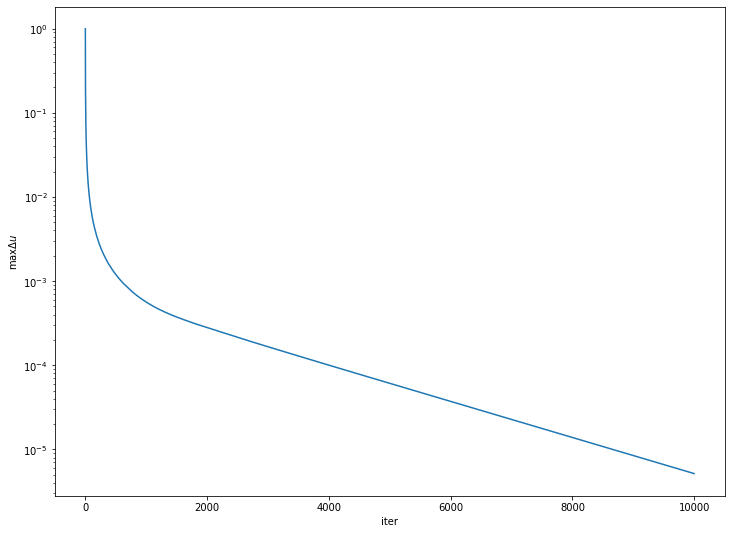

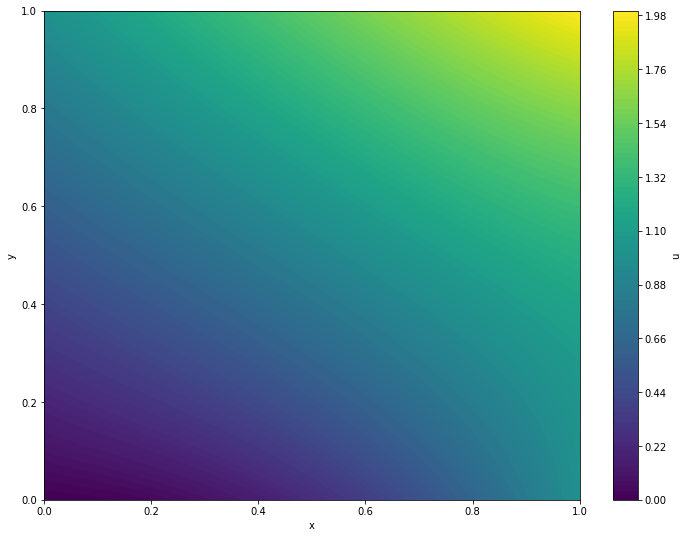

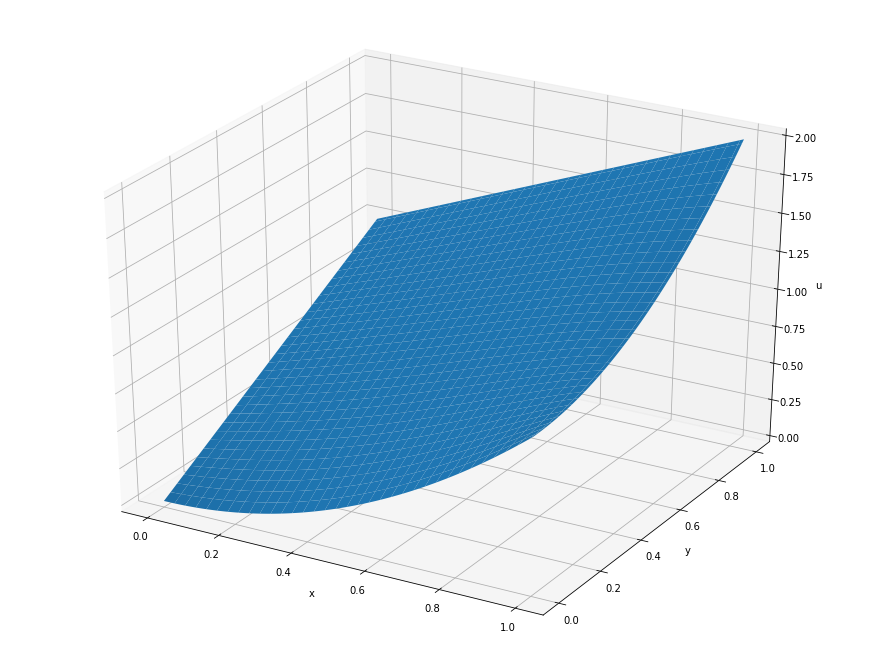

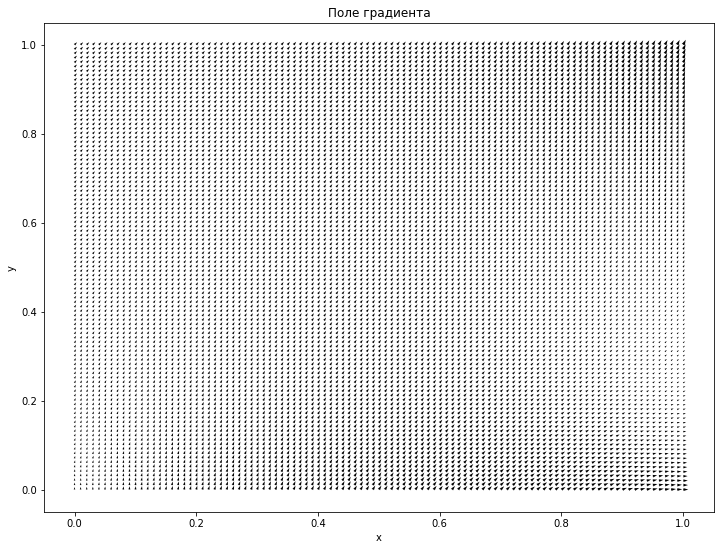

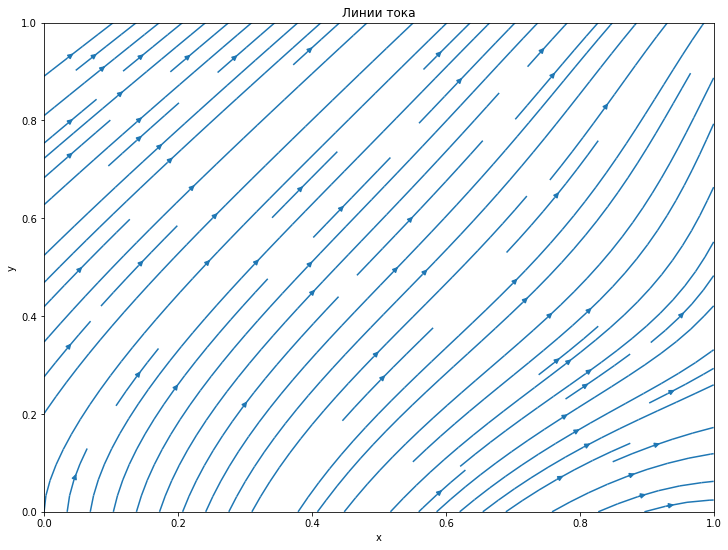

In [45]:
cross(
    x0 = 0,
    x1 = 1,
    nx = 101,
    y0 = 0,
    y1 = 1,
    ny = 101,
    a0 = one,
    a1 = one,
    a2 = one,
    a3 = one,
    b0 = zero,
    b1 = zero,
    b2 = zero,
    b3 = zero,
    c0 = lambda y: y,
    c1 = lambda y: 1 + y ** 2,
    c2 = lambda x: x ** 2,
    c3 = lambda x: 1 + x,
    f = lambda u, x, y: 0,
    n_iter=10000
)

## Потенциал точечного заряда

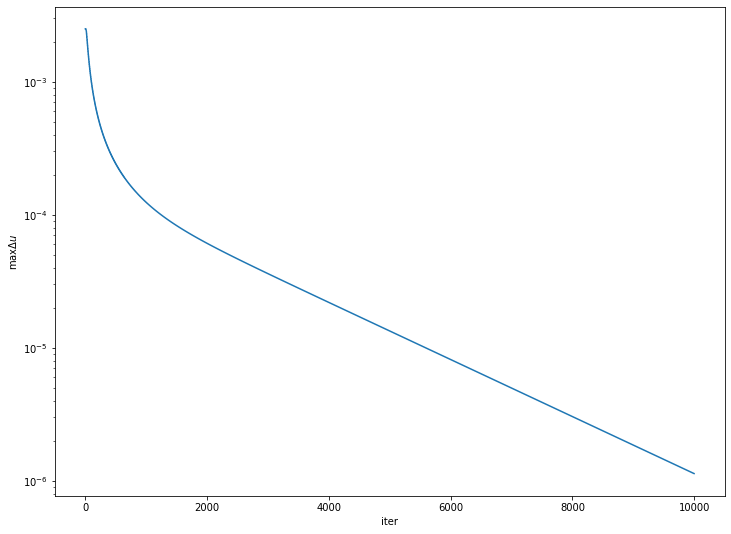

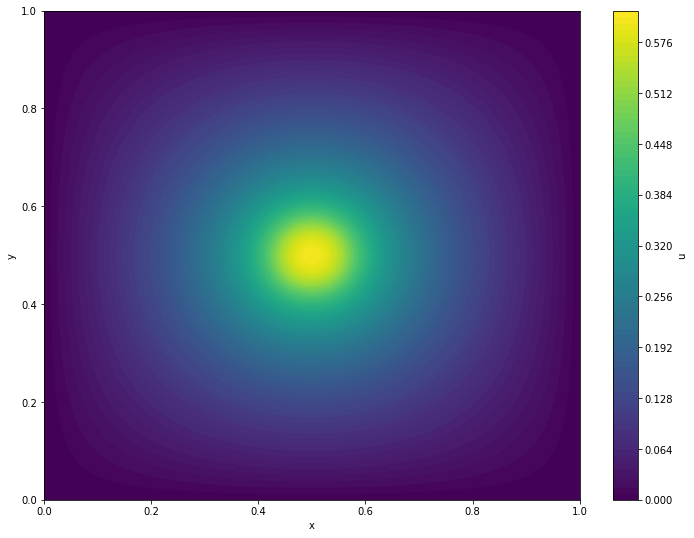

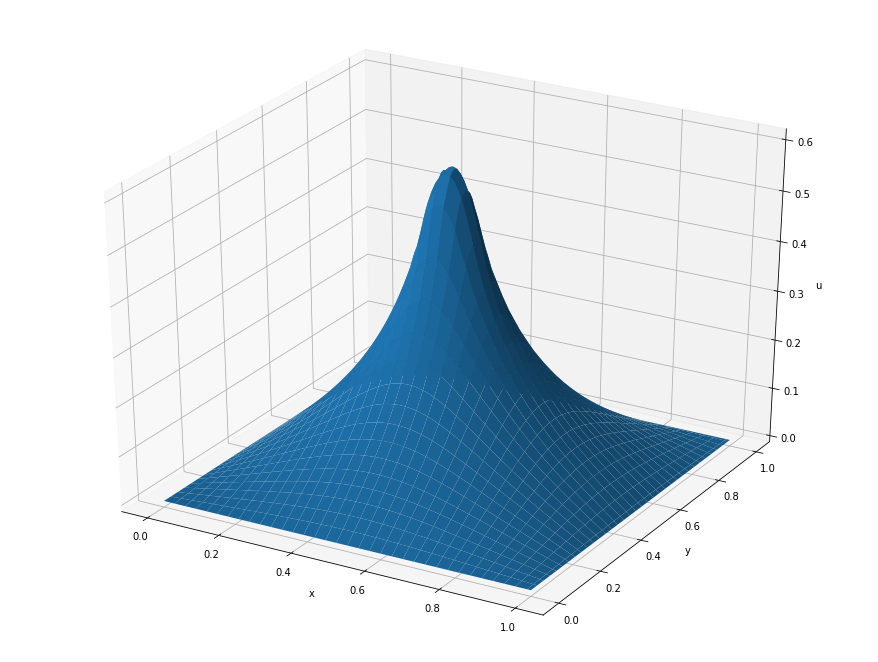

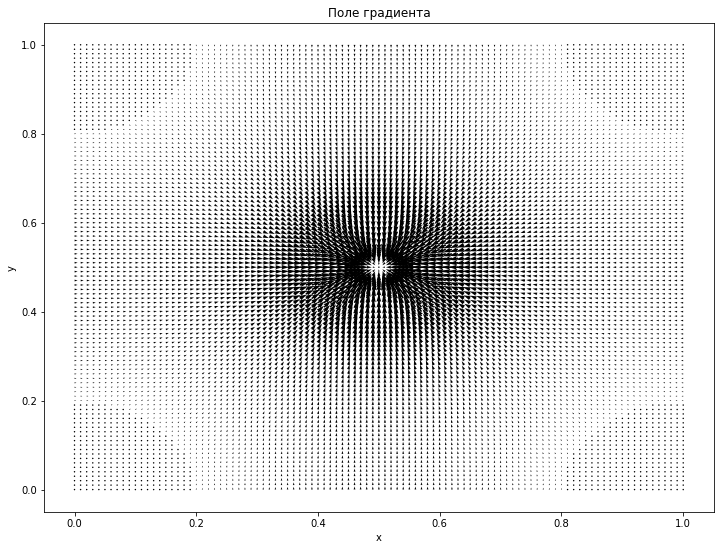

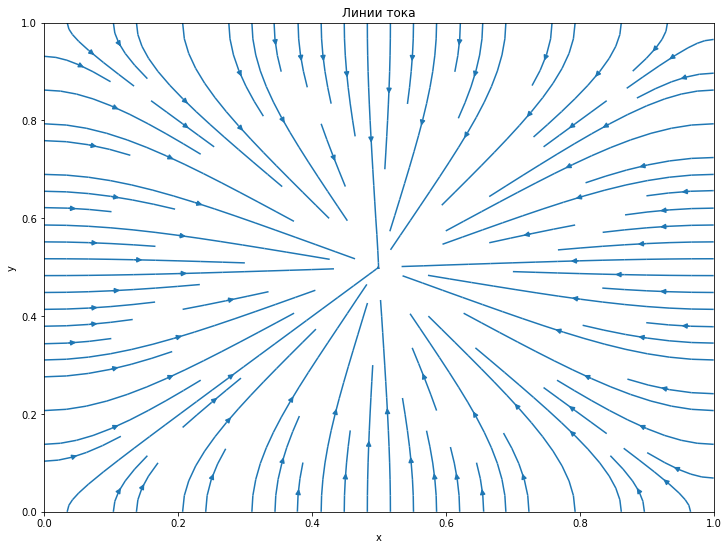

In [46]:
cross(
    x0 = 0,
    x1 = 1,
    nx = 101,
    y0 = 0,
    y1 = 1,
    ny = 101,
    a0 = one,
    a1 = one,
    a2 = one,
    a3 = one,
    b0 = zero,
    b1 = zero,
    b2 = zero,
    b3 = zero,
    c0 = zero,
    c1 = zero,
    c2 = zero,
    c3 = zero,
    f = lambda u, x, y: np.where(((x - 0.5) ** 2 + (y - 0.5) ** 2) < 0.005, -1, 0),
    n_iter=10000
)

## Потенциальное течение жидкости

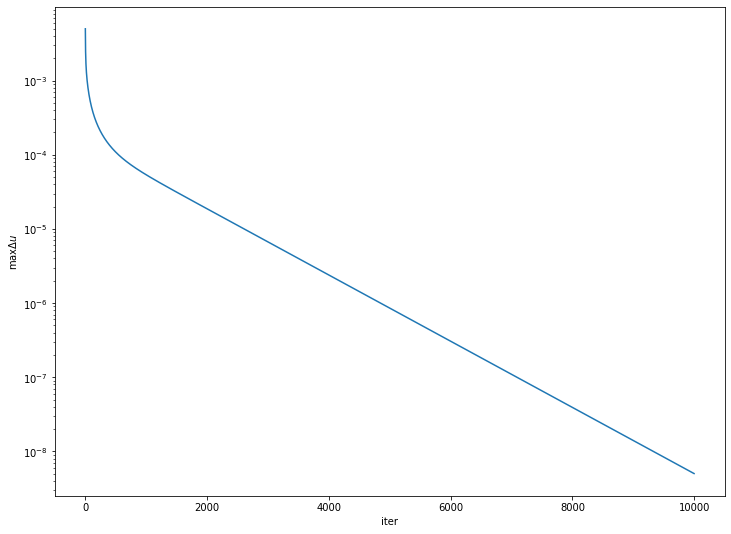

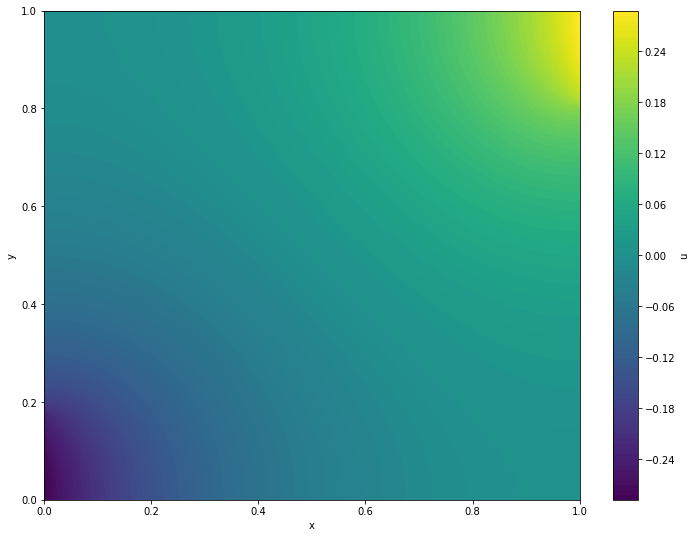

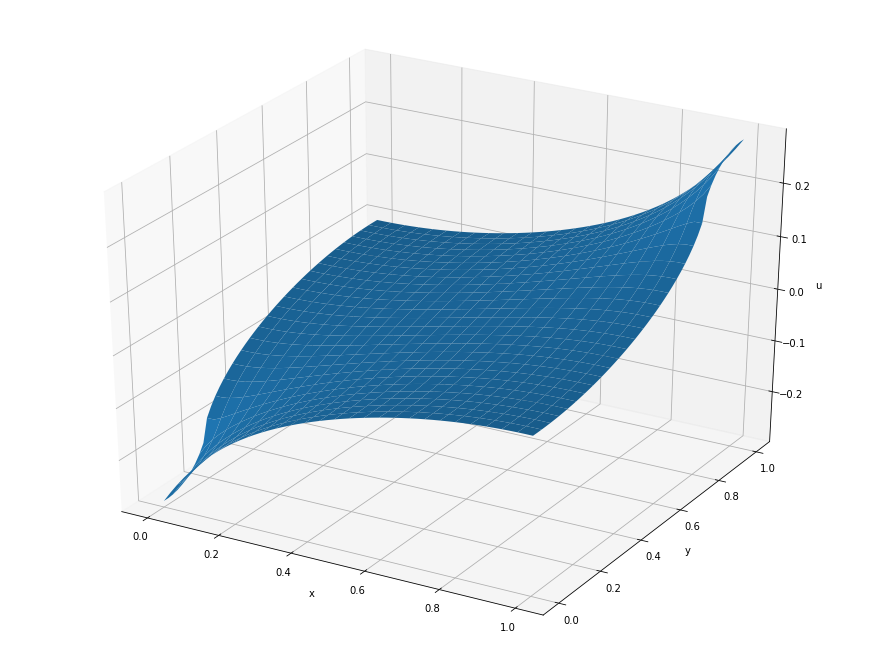

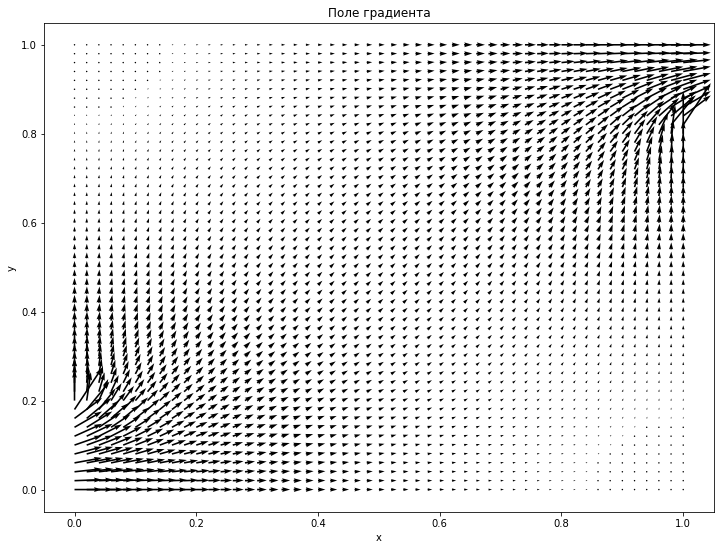

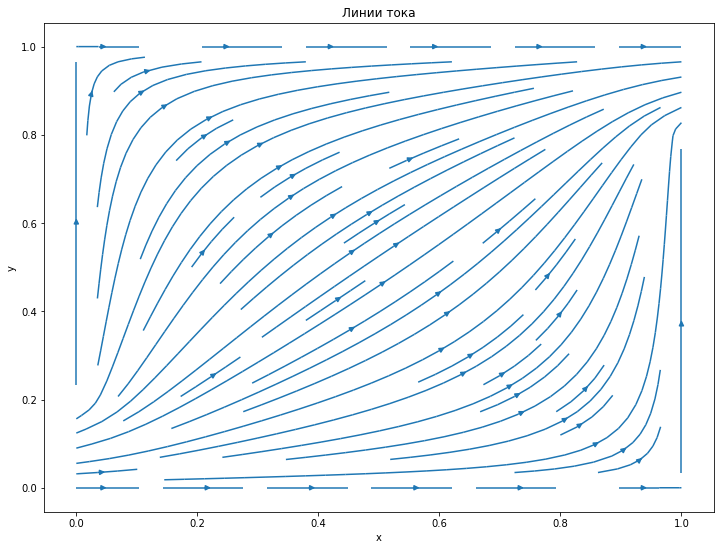

In [47]:
cross(
    x0 = 0,
    x1 = 1,
    nx = 51,
    y0 = 0,
    y1 = 1,
    ny = 51,
    a0 = zero,
    a1 = zero,
    a2 = zero,
    a3 = zero,
    b0 = one,
    b1 = one,
    b2 = one,
    b3 = one,
    c0 = lambda y: np.where(y < 0.2, 1, 0),
    c1 = lambda y: np.where(y > 0.8, 1, 0),
    c2 = zero,
    c3 = zero,
    f = lambda u, x, y: 0,
    n_iter=10000
)

## Задачи:

1. График сходимости рассмотренной схемы можно разделить на три условных этапа: "быстрая" сходимость, промежуточный период, сходимость с $p = 2$ (прямая). Разобраться, как на продолжительность этих этапов влияют начальное приближение и размеры сетки. Попробовать подобрать оптимальное начальное приближение для краевой задачи (использовать граничные условия) и правило для определения минимального числа итераций, после которого решение сходится не быстрее, чем с $p = 2$.
2. C помощью метода неопределённых коэффициентов получить разностную схему на девятиточечном шаблоне: проверить, можно ли к схеме "крест" добавить центральный и угловые элементы и повысить таким образом порядок аппроксимации. Исследовать новую схему на аппроксимацию и реализовать.
3. С помощью метода неопределённых коэффициентов получить разностную схему для решения уравнения Лапласа на семиточечном шаблоне для равномерной треугольной сетки (шаблон состоит их вершин шестиугольника и его середины). Исследовать новую схему на аппроксимацию.
4. Решить внутреннюю задачу Дирихле для уравнения Пуассона в непрямоугольной области. Подумать, как задавать и аппроксимировать границу, обеспечить выполнение граничных условий.
5. Решить краевую задачу задачу Дирихле для уравнения Пуассона в неодносвязной области.
6. Найти стационарное поле температур в своей комнате в общежитии/дома. Геометрию и граничные условия можно задать качественно. Источники и стоки тепла можно задавать с помощью правой части или граничных условий.